In [1]:
import haiku as hk
import jax
import jax.numpy as jnp
import jax.tree_util as jtree

import numpy as np
import optax
from typing import Sequence, NamedTuple
import json

import matplotlib.pyplot as plt

from expt_dln import ex

In [2]:
config = {
    "expt_name": "hyperparam_tuning_run",
    "do_compute_distance": False,
    "do_functional_rank": False,
    "do_hessian_trace": False,
    "do_training": False,
    "input_dist": "uniform",
    "input_dim": 100,
    # "layer_widths": [1000, 1000],
    "layer_widths": np.random.randint(100, 1000, size=5),
    "num_training_data": 10000,
    "seed": 42,
    "sgld_config": {
        "batch_size": 128,
        "epsilon": 1e-6,
        "gamma": 1.0,
        "num_chains": 1,
        "num_steps": 10000
    },
    "true_param_config": {
        "mean": 0.0,
        "method": "rand_rank",
        "prop_rank_reduce": 0.5,
        "std": 5.0
    },
    "verbose": True
}
print(config["layer_widths"])
run = ex.run(config_updates=config)

WARNING - root - Changed type of config entry "layer_widths" from list to ndarray
WARNING - dln_lambdahat - No observers have been added to this run
INFO - dln_lambdahat - Running command 'run_experiment'
INFO - dln_lambdahat - Started
INFO - jax._src.xla_bridge - Unable to initialize backend 'cuda': 
INFO - jax._src.xla_bridge - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO - jax._src.xla_bridge - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: '/opt/homebrew/lib/libtpu.so' (no such file), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file), '/Users/edmund/Desktop/phd_research/projects/validating_lambdahat/libtpu.so' (no such file)


[191 632 491 735 282]
Step 0, loss: 0.012198655866086483
Step 200, loss: 2.6953654289245605
Step 400, loss: 5.399928569793701
Step 600, loss: 8.26364517211914
Step 800, loss: 10.962254524230957
Step 1000, loss: 12.823409080505371
Step 1200, loss: 14.201729774475098
Step 1400, loss: 15.125666618347168
Step 1600, loss: 16.24094581604004
Step 1800, loss: 16.455196380615234
Step 2000, loss: 17.378189086914062
Step 2200, loss: 17.856277465820312
Step 2400, loss: 18.21753692626953
Step 2600, loss: 18.561553955078125
Step 2800, loss: 18.649301528930664
Step 3000, loss: 19.07366943359375
Step 3200, loss: 19.217084884643555
Step 3400, loss: 19.516162872314453
Step 3600, loss: 19.29693031311035
Step 3800, loss: 19.93367576599121
Step 4000, loss: 19.552595138549805
Step 4200, loss: 19.630126953125
Step 4400, loss: 19.720035552978516
Step 4600, loss: 19.41067123413086
Step 4800, loss: 19.435815811157227
Step 5000, loss: 20.110210418701172
Step 5200, loss: 19.65951919555664
Step 5400, loss: 19.2830

/Users/edmund/.local/share/virtualenvs/validating_lambdahat-UCObfUVw/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:3961: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


M_list: [ 73 164 605 464 708 255], indices: [0 1], M_subset: [ 73 164]


INFO - dln_lambdahat - Completed after 0:02:41


lambdahat                : 10349.0322265625
true_lambda              : 10778.5
true_multiplicity        : 1.0
true_rank                : 27
model_dim                : 1018279
Mean MALA accept probs: 0.9989


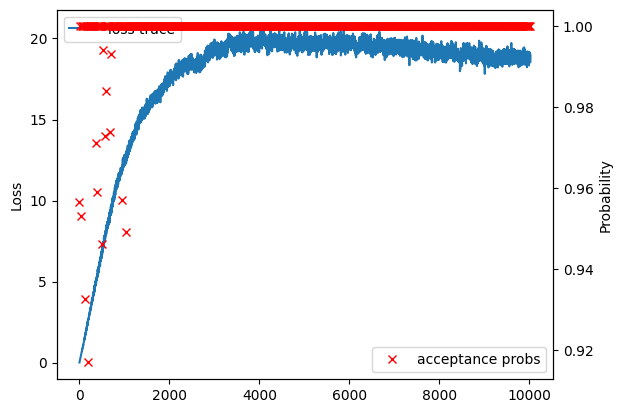

In [11]:
for elem in ["lambdahat", "true_lambda", "true_multiplicity", "true_rank", "model_dim"]:
    print(f"{elem:25s}: {run.info[elem]}")
fig, ax = plt.subplots()
ax.plot(run.info["loss_trace"], label="loss trace")
ax.legend()
ax.set_ylabel("Loss")

ax = ax.twinx()
probs = np.array(run.info["mala_acceptance_probs"])
ax.plot(probs[:, 0], probs[:, 1], "rx", label="acceptance probs")
print(f"Mean MALA accept probs: {probs[:, 1].mean():.4f}")
ax.set_ylabel("Probability")
ax.set_xlabel("Num SGLD Steps")
ax.legend();